In [ ]:
import numpy as np

class gradientDescent:
    def __init__(self, mu=0.3, beta1=0.8, beta2=1.5, epsilon=0.001, alpha=1, x1=1, x2=0):
        self.mu = mu
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.alpha = alpha
        self.x = np.array([[x1], [x2]])
    
    def solve(self):
        x = self.x
        flag = True
        while flag:
            x1 = x[0, 0]
            x2 = x[1, 0]
            f1 = x1**2 + 3*x2**2 - 4*x1 - 2*x1*x2
            
            d1 = 2*x1 - 4 - 2*x2
            d2 = 6*x2 - 2*x1
            
            f_der = np.array([[d1], [d2]])
            d = -f_der
            alpha = self.alpha
            while True:
                y = x + alpha*d
                print(y)
                y1 = y[0, 0]
                y2 = y[0, 1]
                f2 = y1**2 + 3*y2**2 - 4*y1 - 2*y1*y2
                temp = -alpha*np.dot(f_der, d)
                if temp*self.mu > f1-f2:
                    alpha = alpha*self.beta1
                    continue
                elif temp*(1-self.mu) < f1-f2:
                    alpha = alpha*self.beta2
                    continue
                else:
                    if abs(f1-f2) < self.epsilon:
                        flag = False
                    break 
            x = y + alpha*d
        return x

if __name__ == '__main__':
    a = gradientDescent()
    x = a.solve()
    print(x)

In [19]:
import numpy as np

class newtonMethod:
    def __init__(self, mu=0.3, beta1=0.8, beta2=1.5, epsilon=0.001, alpha=1, x1=1, x2=0):
        self.mu = mu
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.alpha = alpha
        self.x = np.array([[x1], [x2]])
    
    def solve(self):
        x = self.x
        flag = True
        index = 0
        while flag:
            x1 = x[0, 0]
            x2 = x[1, 0]
            # f1 = x1**2 + 3*x2**2 - 4*x1 - 2*x1*x2
            f1 = x1*x1 + x1*x2
            
            # d1 = 2*x1 - 4 - 2*x2
            # d2 = 6*x2 - 2*x1
            d1 = 2*x1
            d2 = 2*x2
            
            f_der1 = np.array([[d1], [d2]])
            
            # d11 = 2
            # d12 = -2
            # d21 = -2
            # d22 = 6
            
            d11 = 2
            d12 = 0
            d21 = 0
            d22 = 2
            
            f_der2 = np.array([[d11, d12], [d21, d22]])
            
            d = np.dot(np.matrix(f_der2).I, f_der1)
            
            alpha = self.alpha
            temp = np.dot(f_der1.T, d)
            while True:
                y = x + alpha*d
                # print(y)
                y1 = y[0, 0]
                y2 = y[1, 0]
                
                # f2 = y1**2 + 3*y2**2 - 4*y1 - 2*y1*y2
                f2 = y1*y1 + y2*y2
                
                # print(d)
                # print(f1 + self.mu*alpha*np.dot(f_der1.T, d))
                # print(f1 + (1-self.mu)*alpha*np.dot(f_der1.T, d))
                # break
                if -alpha*temp*self.mu > f1-f2:
                    # print('太大了', alpha)
                    # print(temp*self.mu)
                    # print(f1-f2)
                    alpha = alpha*self.beta1
                    continue
                # elif temp*(1-self.mu) < f1-f2:
                #     print('太小了', alpha)
                #     # print(temp*(1-self.mu))
                #     # print(f1-f2)
                #     alpha = alpha*self.beta2
                #     continue
                else:
                    if abs(f1-f2) < self.epsilon:
                        flag = False
                    break
            index += 1 
            # print('第%d次迭代:'%(index))
            # print(x)
            # print(alpha)
            # print(d)
            x = x + alpha*d
            # break
        print('经历%d次迭代后收敛'%(index))
        return x

if __name__ == '__main__':
    a = newtonMethod()
    x = a.solve()
    print(x)

经历1次迭代后收敛
[[1.]
 [0.]]


In [32]:
x1 = 0.53106994
x2 = 0.27813873
print(2*(x1-1) - 400*x1*(x2-x1**2))
print(200*(x2-x1**2))

-0.11012364123583251
-0.779310234320707


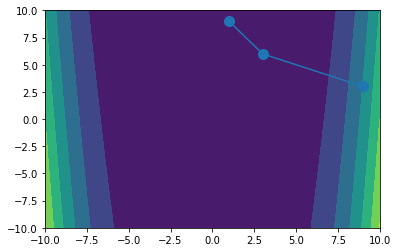

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算x,y坐标对应的高度值
def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2 

# 生成x,y的数据
n = 256
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)

# 把x,y数据生成mesh网格状的数据，因为等高线的显示是在网格的基础上添加上高度值
X, Y = np.meshgrid(x, y)

# 填充等高线
plt.contourf(X, Y, f(X, Y))
game = [9, 3, 1]
scores = [3, 6, 9]
plt.plot(game, scores)
plt.scatter(game, scores, s=100)
# 显示图表
plt.show()

